In [1]:
# Prepare datasets: digits
from sklearn import datasets

digits = datasets.load_digits()
print(digits.keys())
print(digits.data.shape, digits.target.shape)
#print(digits.DESCR)


dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
(1797, 64) (1797,)


In [2]:
set(digits.target)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

<AxesSubplot:>

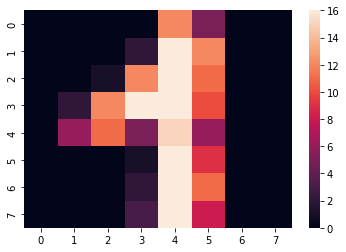

In [3]:
import seaborn as sns

sns.heatmap(digits.data[42].reshape(8,8))

In [4]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

# Data
X, y = digits.data, digits.target
# Build model
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)
# Train model
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
# Score model
clf.score(X_test, y_test)

0.9688888888888889

In [5]:
from LRP import *
model_summary(clf, True)

Number of Coefs (layer):  2
[(64, 100), (100, 10)]
Number of Intercepts (layer):  2
[(100,), (10,)]
Hidden layer activation function :  relu
Output layer activation function :  softmax
Training information: 
Loss :  0.003786996765125021
Number of Iterations for Which Estimator Ran :  121


In [6]:
X_train[0].shape

(64,)

In [7]:
X_train[0].reshape(1,64).shape

(1, 64)

In [8]:
activations = get_activations(clf, X_train[1].reshape(1,64))
[activation.shape for activation in activations]

Append hidden
Appedn output


[(1, 64), (1, 100), (1, 10)]

In [9]:
relevance = LRP_eps_nb(clf, X_train[1].reshape(1,64), False)

Append hidden
Appedn output


100%|██████████| 64/64 [00:00<00:00, 158.51it/s]


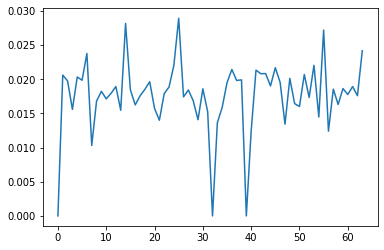

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.plot(relevance[0])

<AxesSubplot:>

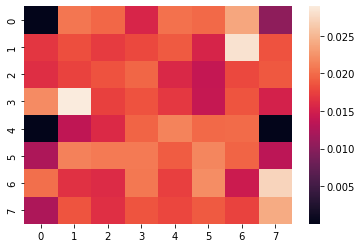

In [11]:
sns.heatmap(np.array(relevance[0]).reshape(8,8))

<AxesSubplot:>

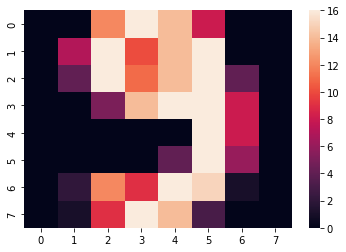

In [12]:
sns.heatmap(X_train[1].reshape(8,8))